<a href="https://colab.research.google.com/github/vindinudecosta/Mobile-Based-Crop-Leaf-Disease-Detection-System-Using-Deep-Learning/blob/main/Potato_Disease_Classification_model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from zipfile import ZipFile
with ZipFile('/content/gdrive/MyDrive/PotatoDisease.zip','r') as zipObj:
     zipObj.extractall('PlantVillage')

In [ ]:
!pip install split-folders[full]

In [ ]:
import splitfolders
input_folder = '/content/PlantVillage/PlantVillage'
splitfolders.ratio(input_folder,output ="dataset",
                   seed = 42,ratio=(0.7,0.1,0.2),
                   group_prefix=None)


Copying files: 2152 files [00:00, 7929.38 files/s]


In [ ]:
import tensorflow as tf
from keras import models, layers
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS =20

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("/content/PlantVillage/PlantVillage")

Found 2152 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
train_datagen = ImageDataGenerator(

                 rescale = 1./255,
                 horizontal_flip= True,
                 rotation_range =10

)

train_generator = train_datagen.flow_from_directory('/content/dataset/train',

                                                    target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                    batch_size= BATCH_SIZE,
                                                    class_mode='sparse',

                                                    )

Found 1506 images belonging to 3 classes.


In [ ]:
validation_datagen = ImageDataGenerator(

                 rescale = 1./255,
                 horizontal_flip= True,
                 rotation_range =10

)

validation_generator = validation_datagen.flow_from_directory('/content/dataset/val',

                                                    target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                    batch_size= BATCH_SIZE,
                                                    class_mode='sparse',

                                                    )

Found 215 images belonging to 3 classes.


In [ ]:
test_datagen = ImageDataGenerator(

                 rescale = 1./255,
                 horizontal_flip= True,
                 rotation_range =10

)

test_generator = test_datagen.flow_from_directory('/content/dataset/test',

                                                    target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                    batch_size= BATCH_SIZE,
                                                    class_mode='sparse',

                                                    )

Found 431 images belonging to 3 classes.


In [ ]:
input_shape =(None,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes =3

# Define inner model
inner_model = models.Sequential([
    layers.InputLayer(input_shape= input_shape[1:]),
    layers.Conv2D(32,kernel_size = (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,kernel_size =(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,kernel_size = (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2))
])

# Define outer model
model = models.Sequential([
    inner_model,
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape = input_shape)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 2, 2, 64)          167104    
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 183,747
Trainable params: 183,747
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
  optimizer = 'adam',
  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits =False),
  metrics = ['accuracy']

)

In [ ]:
history = model.fit(

    train_generator,
    steps_per_epoch= 47,
    batch_size =BATCH_SIZE,
    validation_data= validation_generator,
    validation_steps =6,
    verbose=1,
    epochs =20
)

Epoch 1/20
47/47 [==============================] - 42s 579ms/step - loss: 0.9107 - accuracy: 0.4864 - val_loss: 0.8756 - val_accuracy: 0.4583
Epoch 2/20
47/47 [==============================] - 26s 544ms/step - loss: 0.7951 - accuracy: 0.5828 - val_loss: 0.7438 - val_accuracy: 0.5990
Epoch 3/20
47/47 [==============================] - 27s 579ms/step - loss: 0.6229 - accuracy: 0.7191 - val_loss: 0.5072 - val_accuracy: 0.7917
Epoch 4/20
47/47 [==============================] - 28s 597ms/step - loss: 0.5318 - accuracy: 0.7720 - val_loss: 0.4136 - val_accuracy: 0.8438
Epoch 5/20
47/47 [==============================] - 25s 540ms/step - loss: 0.3733 - accuracy: 0.8412 - val_loss: 0.3485 - val_accuracy: 0.8646
Epoch 6/20
47/47 [==============================] - 27s 585ms/step - loss: 0.3207 - accuracy: 0.8697 - val_loss: 0.3982 - val_accuracy: 0.8281
Epoch 7/20
47/47 [==============================] - 27s 587ms/step - loss: 0.3161 - accuracy: 0.8636 - val_loss: 0.4243 - val_accuracy: 0.8229

In [ ]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 8s 545ms/step - loss: 0.0916 - accuracy: 0.9652


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

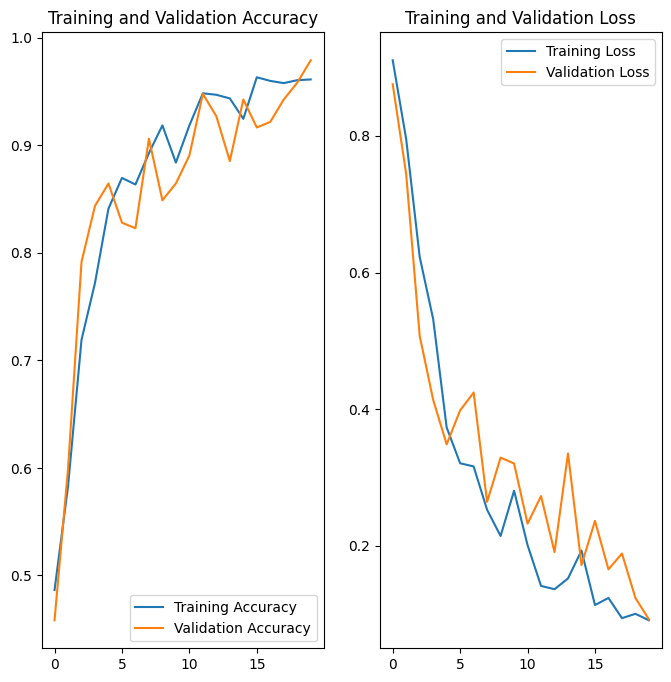

In [ ]:
plt.figure(figsize =(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label = 'Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label = 'Training Loss')
plt.plot(range(EPOCHS),val_loss,label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

first image to predict
actual label:  Potato___Late_blight
1/1 [==============================] - 0s 215ms/step
Predicted label:  Potato___Late_blight


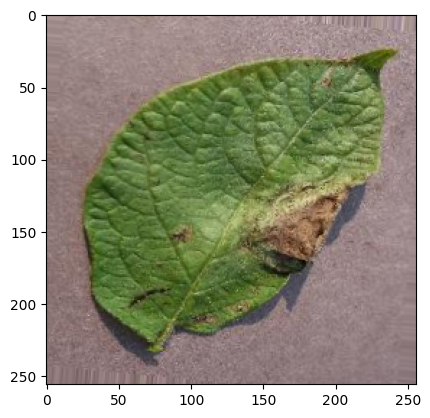

In [ ]:
import numpy as np

for images_batch, labels_batch in test_generator:
  first_image = images_batch[0]
  first_label = int (labels_batch[0])

  print("first image to predict")
  plt.imshow(first_image)
  print("actual label: ", class_names[first_label])


  batch_prediction = model.predict(images_batch)
  print("Predicted label: ",class_names[np.argmax(batch_prediction[0])])
  break

In [ ]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i])
  img_array = tf.expand_dims(img_array,0)

  predictions = model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100* (np.max(predictions[0])),2)

  return predicted_class, confidence

1/1 [==============================] - 0s 20ms/step


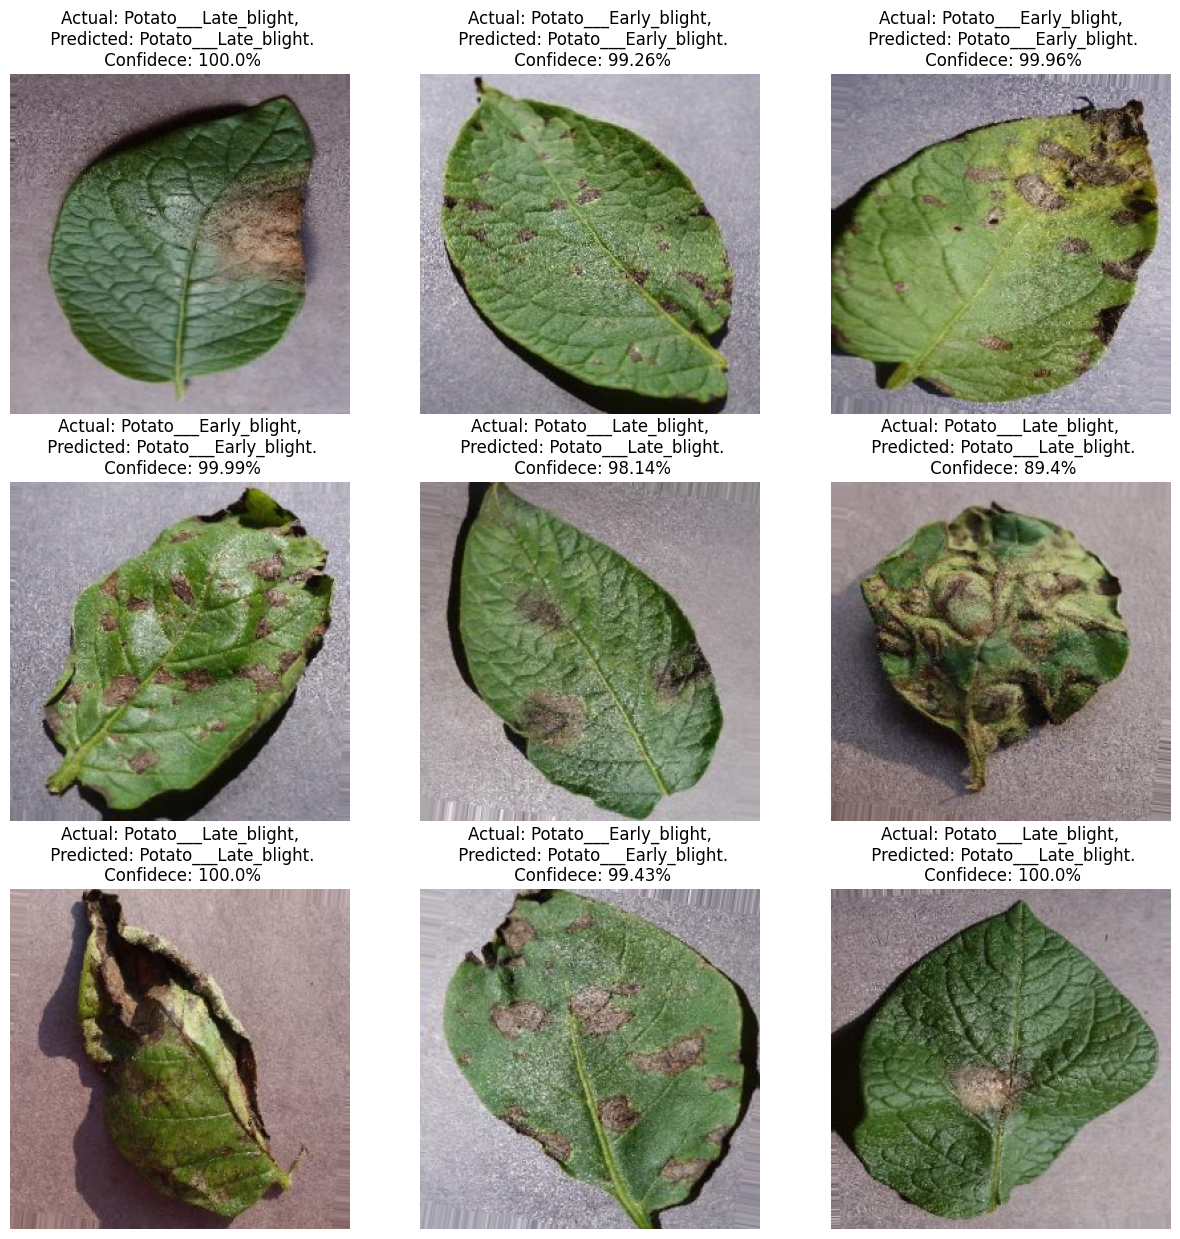

In [ ]:
plt.figure(figsize = (15,15))
for images, labels in test_generator:

  for i in range(9):

    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i])

    predicted_class, confidence = predict(model, images[i])
    actual_class = class_names[int(labels[i])]

    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidece: {confidence}%")

    plt.axis("off")
  break

In [ ]:
model.save("/content/gdrive/MyDrive/Potato_disease_classification_models/trained_model_potato_v1.h5")

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

In [ ]:
with open('/content/gdrive/MyDrive/Potato_disease_classification_models/tflite_model_potato_v1.tflite', 'wb') as f:
   f.write(tflite_quant_model)


In [ ]:
import numpy

In [ ]:
test_images = []
test_labels = []
for i in range(len(test_generator)):
    batch_images, batch_labels = test_generator[i]
    test_images.extend(batch_images)
    test_labels.extend(batch_labels)

# Convert the lists to numpy arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
def evaluate(interpreter):
  prediction= []
  input_index = interpreter.get_input_details()[0]["index"]
  output_index = interpreter.get_output_details()[0]["index"]
  input_format = interpreter.get_output_details()[0]['dtype']

  for i, test_image in enumerate(test_images):
    if i % 100 == 0:
      print('Evaluated on {n} results so far.'.format(n=i))
    test_image = np.expand_dims(test_image, axis=0).astype(input_format)
    interpreter.set_tensor(input_index, test_image)

    # Run inference.
    interpreter.invoke()
    output = interpreter.tensor(output_index)
    predicted_label = np.argmax(output()[0])
    prediction.append(predicted_label)

  print('\n')
  # Comparing prediction results with ground truth labels to calculate accuracy.
  prediction = np.array(prediction)
  accuracy = (prediction == test_labels).mean()
  return accuracy

In [ ]:
# Passing the Integer Quantized TF Lite model to the Interpreter.
interpreter = tf.lite.Interpreter('/content/gdrive/MyDrive/Potato_disease_classification_models/tflite_model_potato_v1.tflite')
# Allocating tensors.
interpreter.allocate_tensors()
# Evaluating the model on the test images.
test_accuracy = evaluate(interpreter)
print('Quantized TFLite Model Test Accuracy:', test_accuracy*100)

Evaluated on 0 results so far.
Evaluated on 100 results so far.
Evaluated on 200 results so far.
Evaluated on 300 results so far.
Evaluated on 400 results so far.


Quantized TFLite Model Test Accuracy: 96.98375870069606
